Video Games data set. 
--

LET'S READ THE DATA SET AND DECLARE LIBRARIES IN PYTHON
--

In [198]:
#DECLARING LIBRARIES
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats as st
import seaborn as sns
import numpy as np
import plotly.express as px

In [199]:
#READING THE DATASET
games=pd.read_csv('datasets/games.csv')
print('The DataFrame has the next columns:\n')
games.info()
#print(games.head())

The DataFrame has the next columns:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Clean and clear the Data Frame. 
--
Analize duplicated values, missing values, columns names, type of value of each column.
Columns names are with capital letters, lets change them to lower letters to have a better data management. 

In [200]:
#UPPER TO LOWER
new_columns= []
for c in games.columns:
    low_c=c.lower()
    new_columns.append(low_c)
games.columns = new_columns
print(games.columns)
#games.info()

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


In [201]:
#DUPLICATED?
print('The DF has ',games.duplicated().sum(), 'duplicated rows.')
print('The DF has the following amount of null in each column:\n',games.isna().sum())

The DF has  0 duplicated rows.
The DF has the following amount of null in each column:
 name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64


Analyze each column with NaN values to determine if it is possible to remove the rows or replace the value with a different one that fits the values.
Let's start with the name and gender columns, because it looks like their NaN values belong to the same rows.

In [202]:
#ANALYZE ALL COLUMNS TO PROCEED THE CLEANING
print("The two rows with NaN value in the column name are:\n",games[games['name'].isna()])
print("The two rows with NaN value in the column genre are:\n",games[games['genre'].isna()])
games.fillna({'name':'NA'},inplace=True)
games.fillna({'genre':'NA'},inplace=True)
print('Now the NaN values in name is:',games['name'].isna().sum())
print('Now the NaN values in genre is:',games['genre'].isna().sum())
#games.info()

The two rows with NaN value in the column name are:
       name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN           1993.0   NaN      1.78      0.53      0.00   
14244  NaN      GEN           1993.0   NaN      0.00      0.00      0.03   

       other_sales  critic_score user_score rating  
659           0.08           NaN        NaN    NaN  
14244         0.00           NaN        NaN    NaN  
The two rows with NaN value in the column genre are:
       name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN           1993.0   NaN      1.78      0.53      0.00   
14244  NaN      GEN           1993.0   NaN      0.00      0.00      0.03   

       other_sales  critic_score user_score rating  
659           0.08           NaN        NaN    NaN  
14244         0.00           NaN        NaN    NaN  
Now the NaN values in name is: 0
Now the NaN values in genre is: 0


Clearing the release year column of its 250 NaN values. 
Calculate the mean and median to determine the value that will replace the NaN values.

In [203]:
#CLEAN COLUMN YEAR OF RELEASE
print('Mean -> ',games['year_of_release'].mean())
print('Median->',games['year_of_release'].median())
games.fillna({'year_of_release':2006.0},inplace=True)
print('Now the NaN values in year_of_release is: ',games['year_of_release'].isna().sum())
print('After the change the Mean is-> ',games['year_of_release'].mean())
print('After the change the Median is ->',games['year_of_release'].median())
games['year_of_release']=games['year_of_release'].astype('int')
#games.info()

Mean ->  2006.4846163200777
Median-> 2007.0
Now the NaN values in year_of_release is:  0
After the change the Mean is->  2006.4768172300328
After the change the Median is -> 2007.0


Now let's clean critic_score and user_score columns.
Both columns have more than 6000 NaN values, let's calculate the mean and the median.
Both columns need to have float type of values. 

In [204]:
#CLEAN SCORES COLUMNS. 
#critic_score column
print('Mean of critic_score ->',games['critic_score'].mean())
print('Median of critic_score ->',games['critic_score'].median())
games.fillna({'critic_score':71},inplace=True)
print('After the replacement the Mean of critic_score is->',games['critic_score'].mean())
print('After the replacement the Median of critic_score is->',games['critic_score'].median())

#user_score column
#values=games.query("user_score != 'tbd'")
#tbd_values=games.query("user_score == 'tbd'").count()
#nan_values = games['user_score'].isna().sum()
#print('There are nan ->',nan_values)
#print('There are tbd ->',tbd_values['user_score'])
#print(games['user_score'].count())
#values=values['user_score'].astype('float')
#games.replace({'user_score':'tbd'},'7.5',inplace=True)
#print('Mean of user_score ->',values.mean())
#print('Median of user_score ->',values.median())
#games['user_score']=games['user_score'].astype('float')
#games.fillna({'user_score':7.5},inplace=True)
#print('After the replacement the Mean of user_score ->',games['user_score'].mean())
#print('After the replacement the Median of user_score ->',games['user_score'].median())

games['user_score']=pd.to_numeric(games['user_score'],errors='coerce')
print('Mean of user_score ->',games['user_score'].mean())
print('Median of user_score ->',games['user_score'].median())
games.fillna({'user_score':7.5},inplace=True)
print('After the replacement the Mean of user_score ->',games['user_score'].mean())
print('After the replacement the Median of user_score ->',games['user_score'].median())


Mean of critic_score -> 68.96767850559173
Median of critic_score -> 71.0
After the replacement the Mean of critic_score is-> 70.01064911755908
After the replacement the Median of critic_score is-> 71.0
Mean of user_score -> 7.125046113306982
Median of user_score -> 7.5
After the replacement the Mean of user_score -> 7.329739754711337
After the replacement the Median of user_score -> 7.5


In [205]:
games.fillna({'rating':'RP'},inplace=True)
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int32  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  float64
 9   user_score       16715 non-null  float64
 10  rating           16715 non-null  object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.3+ MB


In [206]:
#Totals of sales. 
games['total_sales']=games['na_sales']+games['eu_sales']+games['jp_sales']+games['other_sales']
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,71.0,7.5,RP,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,71.0,7.5,RP,31.38


SUMMARY OF DATA PREPARATION.

Now the data frame hasn't duplicated values or absent values. 
The names of the columns have an easy format. 
And now the dataset has a new column with all the total of all the sales. 


DATA ANALYSIS 
--

Let's start for analyze the data from the perspective of the year of release of each platform. 
How many games were released in different years?
Is the data meaningful for each period?

Total of games released by years by each platforms:



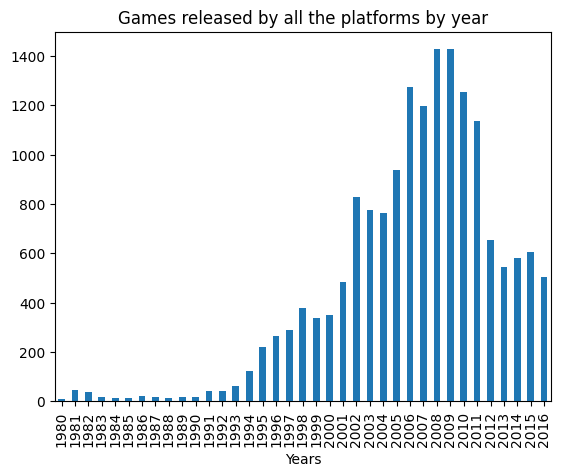

Total of sales released by years by each platforms:



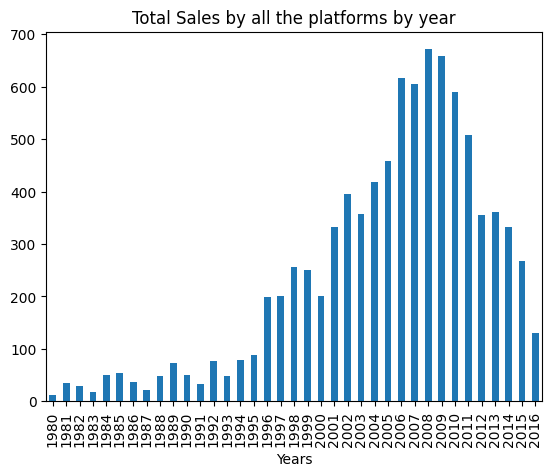

In [207]:
#GRAPHING PLATFORMS BY YEAR.
#print(games.groupby('year_of_release').count()['platform'])
print('Total of games released by years by each platforms:\n')
games.groupby('year_of_release')['platform'].count().plot(kind='bar',y='platform',x='year_of_release',xlabel='Years', title='Games released by all the platforms by year')
plt.show()

print('Total of sales released by years by each platforms:\n')
games.groupby('year_of_release')['total_sales'].sum().plot(kind='bar',y='total_sales',x='year_of_release',xlabel='Years', title='Total Sales by all the platforms by year')
plt.show()

--- According to the previous graphs, the platforms launched more games and obtained more income between 2005 and 2011. -- 

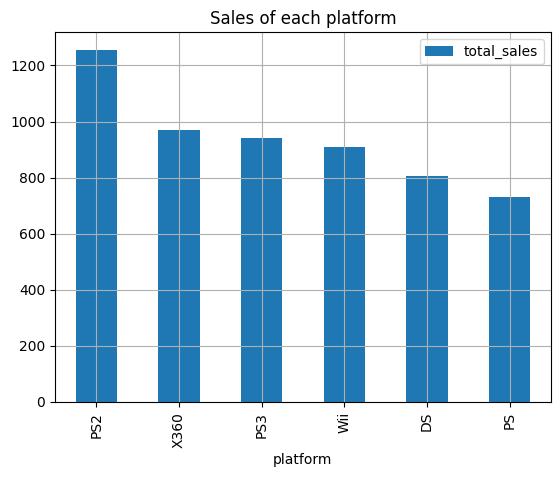

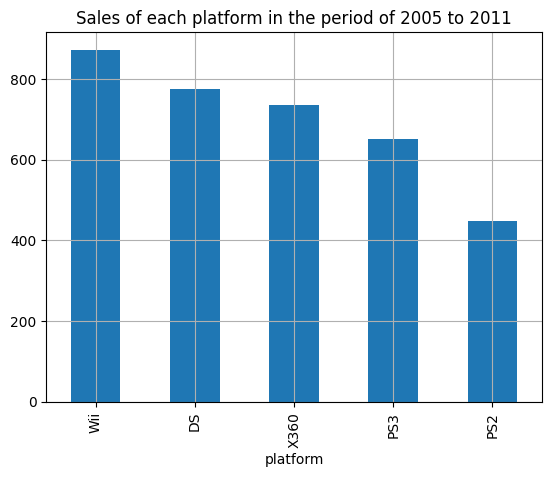

In [208]:
#PLATFORMS TOP 6 IN SALES. 

sales_platforms= games.groupby('platform')['total_sales'].sum().sort_values(ascending=False).reset_index()
top=sales_platforms[sales_platforms['total_sales']>700]
#print(top)
top.plot(kind='bar',x='platform',y='total_sales',title='Sales of each platform',grid=True)
plt.show()
games_top = games.query("platform in @top.platform")

sales_platforms_period = games[(games['year_of_release']>2004) & (games['year_of_release']<2012)].groupby('platform')['total_sales'].sum().sort_values(ascending=False)
top_period = sales_platforms_period[s_p>400]
top_period.plot(kind='bar',x='platform',y='total_sales',title='Sales of each platform in the period of 2005 to 2011',grid=True)
plt.show()

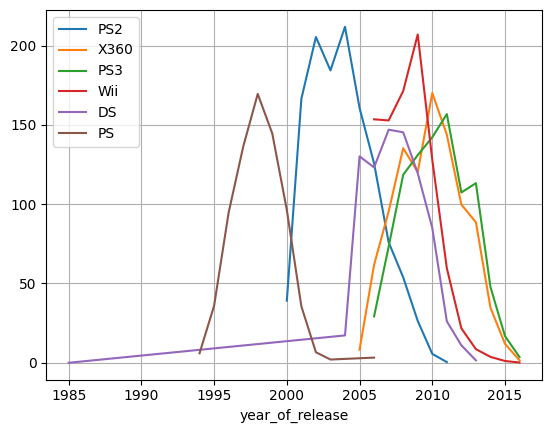

In [209]:
#GRAPHING SALES OF TOP 6 PLATFORMS.
PS2=games_top[games_top['platform']=='PS2'].groupby('year_of_release')['total_sales'].sum()
X360=games_top[games_top['platform']=='X360'].groupby('year_of_release')['total_sales'].sum()
PS3=games_top[games_top['platform']=='PS3'].groupby('year_of_release')['total_sales'].sum()
Wii=games_top[games_top['platform']=='Wii'].groupby('year_of_release')['total_sales'].sum()
DS=games_top[games_top['platform']=='DS'].groupby('year_of_release')['total_sales'].sum()
PS=games_top[games_top['platform']=='PS'].groupby('year_of_release')['total_sales'].sum()

PS2.plot(x='year_of_release',y='total_sales')
X360.plot(x='year_of_release',y='total_sales')
PS3.plot(x='year_of_release',y='total_sales')
Wii.plot(x='year_of_release',y='total_sales')
DS.plot(x='year_of_release',y='total_sales')
PS.plot(x='year_of_release',y='total_sales')
plt.legend(['PS2','X360','PS3','Wii','DS','PS'])
plt.grid(True)

In [210]:
#DECLARING FUNCTION TO PRINT AND CALCULATE TIMES 
def imprimir (max_sales,peak, to_peak, to_fall, life_time,start,end):
    print('The life cycle of the platform is in the period of [',start ,'-', end,'] \n')
    print('Platform Life time -> ',life_time,'\n')
    print('The maximum year with the maximum sales: \n $',max_sales,' in ',peak,'\n')
    print('To get to the peak of sales it took:\n',to_peak,'\n')
    print('After the peak of sales, the platform last : \n',to_fall,'\n')

def life_cycle(Platform,Platform_start, Platform_end):
    
    Platform_max_sales = Platform.max()
    Platform_DF=Platform.reset_index()
    Platform_peak=Platform_DF[Platform_DF['total_sales']==Platform_max_sales]['year_of_release'].max()
    Platform_time_to_peak = Platform_peak - Platform_start
    Platform_time_to_fall = Platform_end - Platform_peak
    Platform_life_time= Platform_end - Platform_start 
    
    return Platform_max_sales,Platform_peak,Platform_time_to_peak, Platform_time_to_fall,Platform_life_time
    

The life cycle of the platform is in the period of [ 2000 - 2011 ] 

Platform Life time ->  11 

The maximum year with the maximum sales: 
 $ 211.81  in  2004 

To get to the peak of sales it took:
 4 

After the peak of sales, the platform last : 
 7 

year_of_release
2000     39.17
2001    166.43
2002    205.38
2003    184.31
2004    211.81
2005    160.66
2006    125.63
2007     75.99
2008     53.90
2009     26.40
2010      5.64
2011      0.45
Name: total_sales, dtype: float64
year_of_release
2000     82
2001    185
2002    280
2003    256
2004    259
2005    260
2006    293
2007    214
2008    191
2009     96
2010     38
2011      7
Name: name, dtype: int64


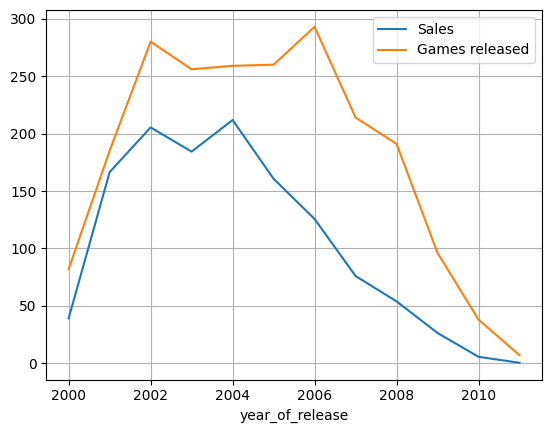

In [211]:
#PS2 INFO
PS2_platform = games_top[games_top['platform']=='PS2']
PS2_start = PS2_platform['year_of_release'].min()
PS2_end = PS2_platform['year_of_release'].max()
PS2_games = PS2_platform.groupby('year_of_release')['name'].count()
PS2_max_sales,PS2_peak, PS2_to_peak, PS2_to_fall, PS2_life_time =life_cycle(PS2,PS2_start,PS2_end)
imprimir(PS2_max_sales,PS2_peak, PS2_to_peak, PS2_to_fall, PS2_life_time,PS2_start,PS2_end)
print(PS2)
print(PS2_games)
PS2.plot(x='year_of_release',y='total_sales')
PS2_games.plot(x='year_of_release',y='name')
plt.legend(['Sales','Games released'])
plt.grid(True)

The life cycle of the PS2 platform was 11 years from the release of its first game to its discontinuation.
It reached its peak sales in 2004, 4 years after its creation.
However, the platform saw rapid growth and its revenue was high between the second and seventh years.
Of 11 years, 6 had good sales [2001 - 2006], more than the other years of their cycle.
The first year was not so good, but in the second year sales increased.
From the eighth year onwards, sales began to fall.
If we compare the number of games released and the sales of each year, we can see that the first peak of good sales was the first peak of games released. But the sales didn't increase in the second peak of released games. Actually, in that year (2006), the sales were already decreasing.     
They released a huge number of games for 8 years, but only 6 of those years were worth it.

The life cycle of the platform is in the period of [ 2005 - 2016 ] 

Platform Life time ->  11 

The maximum year with the maximum sales: 
 $ 170.03  in  2010 

To get to the peak of sales it took:
 5 

After the peak of sales, the platform last : 
 6 

year_of_release
2005      8.25
2006     61.80
2007     95.41
2008    135.26
2009    120.29
2010    170.03
2011    143.84
2012     99.74
2013     88.58
2014     34.74
2015     11.96
2016      1.52
Name: total_sales, dtype: float64
year_of_release
2005     18
2006    123
2007    123
2008    146
2009    172
2010    182
2011    206
2012    106
2013     75
2014     63
2015     35
2016     13
Name: name, dtype: int64


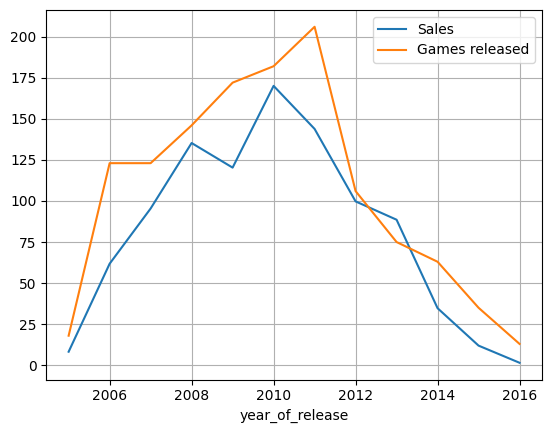

In [212]:
#X30 INFO
X360_platform = games_top[games_top['platform']=='X360']
X360_games = X360_platform.groupby('year_of_release')['name'].count()
X360_start = X360_platform['year_of_release'].min()
X360_end = X360_platform['year_of_release'].max()
X360_max_sales,X360_peak, X360_to_peak, X360_to_fall, X360_life_time =life_cycle(X360,X360_start,X360_end)
imprimir(X360_max_sales,X360_peak, X360_to_peak, X360_to_fall, X360_life_time,X360_start,X360_end)
print(X360)
print(X360_games)
X360.plot(x='year_of_release',y='total_sales')
X360_games.plot(x='year_of_release',y='name')
plt.legend(['Sales','Games released'])
plt.grid(True)

The X360 platform had a life cycle of 11 years from when it released its first game until it went off the market.
It reached peak sales in 2010, five years after its inception. Of the 11 years, six had higher sales (2007 - 2011). The platform released many games for seven years. This strategy of releasing more games seems to have worked for them. When they released games, the sales kept growing. 
It had the highest revenue in the fifth year. However, sales began to fall in 2013 and stopped in 2016. 

The life cycle of the platform is in the period of [ 2006 - 2016 ] 

Platform Life time ->  10 

The maximum year with the maximum sales: 
 $ 156.78  in  2011 

To get to the peak of sales it took:
 5 

After the peak of sales, the platform last : 
 5 

year_of_release
2006     29.27
2007     73.19
2008    118.52
2009    130.93
2010    142.17
2011    156.78
2012    107.36
2013    113.25
2014     47.76
2015     16.82
2016      3.60
Name: total_sales, dtype: float64
year_of_release
2006     52
2007     90
2008    138
2009    162
2010    181
2011    215
2012    148
2013    126
2014    108
2015     73
2016     38
Name: name, dtype: int64


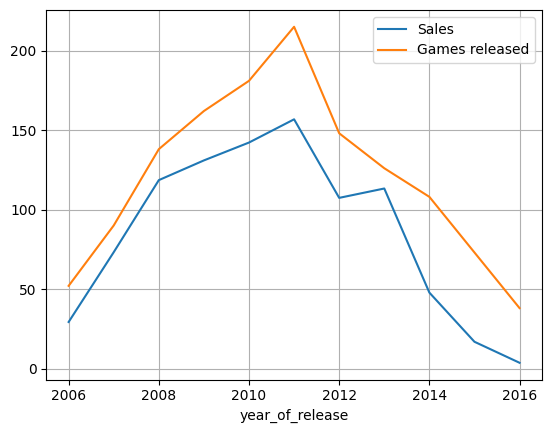

In [213]:
#PS3 INFO
PS3_platform = games_top[games_top['platform']=='PS3']
PS3_start = PS3_platform['year_of_release'].min()
PS3_end = PS3_platform['year_of_release'].max()
PS3_max_sales,PS3_peak, PS3_to_peak, PS3_to_fall, PS3_life_time =life_cycle(PS3,PS3_start,PS3_end)
PS3_games = PS3_platform.groupby('year_of_release')['name'].count()
imprimir(PS3_max_sales,PS3_peak, PS3_to_peak, PS3_to_fall, PS3_life_time,PS3_start,PS3_end)
print(PS3)
print(PS3_games)
PS3.plot(x='year_of_release',y='total_sales')
PS3_games.plot(x='year_of_release',y='name')
plt.legend(['Sales','Games released'])
plt.grid(True)

The PS3 platform had a life cycle of 10 years from when it released its first game until it went off the market.
It reached peak sales in 2011, 5 years after its inception. In the period of 2008 to 2013 it had good sales, and it's the same period when it released more games to the market.  
In 2014 the sales began to fall to 2016 that stopped to sale. 

The life cycle of the platform is in the period of [ 2006 - 2016 ] 

Platform Life time ->  10 

The maximum year with the maximum sales: 
 $ 206.97  in  2009 

To get to the peak of sales it took:
 3 

After the peak of sales, the platform last : 
 7 

year_of_release
2006    153.48
2007    152.77
2008    171.32
2009    206.97
2010    127.95
2011     59.65
2012     21.71
2013      8.59
2014      3.75
2015      1.14
2016      0.18
Name: total_sales, dtype: float64
year_of_release
2006     78
2007    185
2008    282
2009    325
2010    253
2011    143
2012     31
2013     12
2014      6
2015      4
2016      1
Name: name, dtype: int64


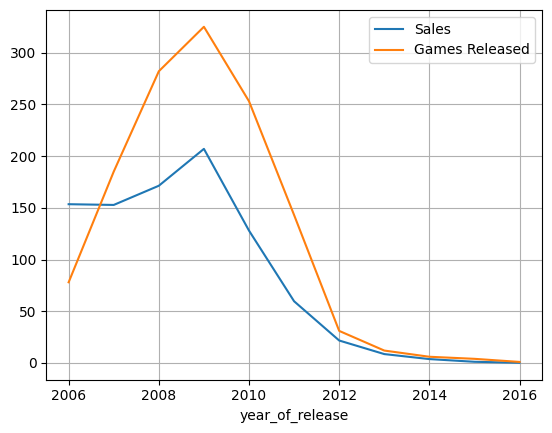

In [214]:
#Wii INFO
Wii_platform = games_top[games_top['platform']=='Wii']
Wii_start = Wii_platform['year_of_release'].min()
Wii_end = Wii_platform['year_of_release'].max()
Wii_games = Wii_platform.groupby('year_of_release')['name'].count()
Wii_max_sales,Wii_peak, Wii_to_peak, Wii_to_fall, Wii_life_time =life_cycle(Wii,Wii_start,Wii_end)
imprimir(Wii_max_sales,Wii_peak, Wii_to_peak, Wii_to_fall, Wii_life_time,Wii_start,Wii_end)
print(Wii)
print(Wii_games)
Wii.plot(x='year_of_release',y='total_sales')
Wii_games.plot(x='year_of_release',y='name')
plt.legend(['Sales','Games Released'])
plt.grid(True)

The Wii platform had a 10-year life cycle from the release of its first game (2006) until its discontinuation.
It reached its peak sales in 2009, 3 years after its creation.
From its beginnings, it had a high income that lasted five years (2006 - 2010). In 2011 sales began to fall sharply and in 2016 they stopped.
Compared to other platforms, it started releasing games quickly, with 78 games released. The following year, they released almost twice as many as the first year. However, although they continued to release more games, revenue did not multiply, but sales were good.

The life cycle of the platform is in the period of [ 1985 - 2013 ] 

Platform Life time ->  28 

The maximum year with the maximum sales: 
 $ 146.94  in  2007 

To get to the peak of sales it took:
 22 

After the peak of sales, the platform last : 
 6 

year_of_release
1985      0.02
2004     17.27
2005    130.14
2006    123.15
2007    146.94
2008    145.31
2009    119.54
2010     85.02
2011     26.18
2012     11.01
2013      1.54
Name: total_sales, dtype: float64
year_of_release
1985      1
2004     23
2005    118
2006    231
2007    376
2008    492
2009    403
2010    323
2011    153
2012     23
2013      8
Name: name, dtype: int64


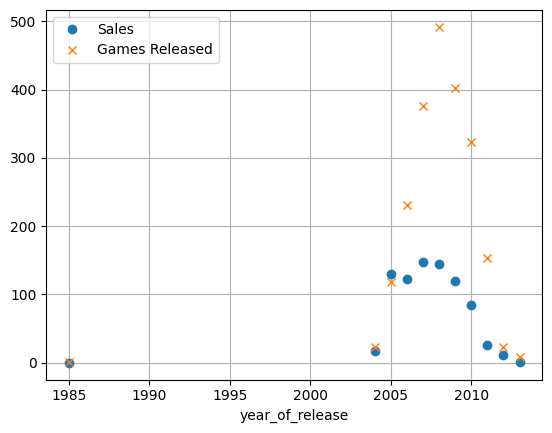

In [215]:
#DS INFO
DS_platform = games_top[games_top['platform']=='DS']
DS_games = DS_platform.groupby('year_of_release')['name'].count()
DS_start = DS_platform['year_of_release'].min()
DS_end = DS_platform['year_of_release'].max()
DS_max_sales,DS_peak, DS_to_peak, DS_to_fall, DS_life_time =life_cycle(DS,DS_start,DS_end)
imprimir(DS_max_sales,DS_peak, DS_to_peak, DS_to_fall, DS_life_time,DS_start,DS_end)
print(DS)
print(DS_games)
DS.plot(x='year_of_release',y='total_sales',style='o')
DS_games.plot(x='year_of_release',y='name',style='x')
plt.legend(['Sales','Games Released'])
plt.grid(True)

The DS platform's life cycle lasted 28 years from the release of its first game (1994) until its discontinuation.
This platform is the oldest, with more than 20 years of good sales.
However, it took 22 years to reach the peak of sales.
The platform first released a game in 1985 and then waited until 2004 to release more. We could change its starting year to 2004 because, in 1985, it only released one game. We have here atypical data. So, it took 3 years to get to the highest point in sales. 
After 2004, sales growth continued until 2007, when sales reached their highest point. From 2005 to 2009, sales remained good before declining, and in 2013, sales stopped.
Once again, we can see that the release of games helped increase revenue.

The life cycle of the platform is in the period of [ 1994 - 2006 ] 

Platform Life time ->  12 

The maximum year with the maximum sales: 
 $ 169.49  in  1998 

To get to the peak of sales it took:
 4 

After the peak of sales, the platform last : 
 8 

year_of_release
1994      6.03
1995     35.96
1996     94.70
1997    136.17
1998    169.49
1999    144.53
2000     96.37
2001     35.59
2002      6.67
2003      2.07
2006      3.28
Name: total_sales, dtype: float64
year_of_release
1994     17
1995     99
1996    164
1997    188
1998    248
1999    200
2000    160
2001     91
2002     20
2003      3
2006      7
Name: name, dtype: int64


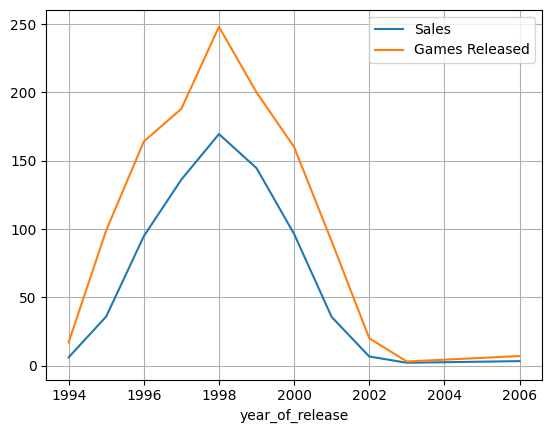

In [216]:
#PS INFO
PS_platform = games_top[games_top['platform']=='PS']
PS_start = PS_platform['year_of_release'].min()
PS_end = PS_platform['year_of_release'].max()
PS_games = PS_platform.groupby('year_of_release')['name'].count()
PS_max_sales,PS_peak, PS_to_peak, PS_to_fall, PS_life_time =life_cycle(PS,PS_start,PS_end)
imprimir(PS_max_sales,PS_peak, PS_to_peak, PS_to_fall, PS_life_time,PS_start,PS_end)
print(PS)
print(PS_games)
PS.plot(x='year_of_release',y='total_sales')
PS_games.plot(x='year_of_release',y='name')
plt.legend(['Sales','Games Released'])
plt.grid(True)

The PS platform had a 12-year life cycle from the release of its first game (1994) until it was discontinued.
This platform is one of the oldest and has good sales. It just took four years to reach its highest point of sales.  
The platform released 17 games for the first time in 1994. Then, it started to release more, and while the platform was releasing more games, the sales were increasing proportionally.
From 1996 to 2000, it had good sales. In 1998, the platform released the maximum number of games of its entire life, and in the same way, it sold more. 
After that year, sales remained suitable for two more years before starting to fall, and in 2006, sales stopped. 
If we compare this platform with its successor, we can assume that it stopped releasing games because PS2 was well-accepted by the public. 

In [217]:
#MEAN of times of the top 6 companies
mean_lifetime= (PS2_life_time+X360_life_time+PS3_life_time+Wii_life_time+PS_life_time)/5
print('Mean Life of the Top 6 compaies -> ', mean_lifetime)
mean_topeak = (PS2_to_peak+X360_to_peak+PS3_to_peak+PS_to_peak+Wii_to_peak)/5
print('Mean time to get to the highest point in sales of the Top 5 companies -> ', mean_topeak)
mean_tofall = (PS2_to_fall+X360_to_fall+PS3_to_fall+PS_to_fall+Wii_to_fall+DS_to_fall)/6
print('Average time from the highest point of sales to the discontinuation of the Top 6 companies -> ', mean_tofall)

Mean Life of the Top 6 compaies ->  10.8
Mean time to get to the highest point in sales of the Top 5 companies ->  4.2
Average time from the highest point of sales to the discontinuation of the Top 6 companies ->  6.5


Summary.
We can set a period from 2000 to 2015 because we are covering the period when the companies started and fell. I consider it essential to analyze how they began, what strategies they implemented, and how the market reacted. Then, we can see how their sales improved. After that, we will see what happened in the last years of their lives.
It is essential to mention that in the average life and the time that sales reach the highest point, the data from the DS platform gives atypical data, so it is better to eliminate that information from these two calculations.
So, the top 5 companies in sales have a relationship in that their average lifetime is 10.8 years, and the time to reach the highest point in sales is 4.2 years. Furthermore, the relationship between the number of games released is directly proportional to total sales.

Boxplot for total sales for all platforms.
Are the differences in sales significant? What happens to average sales across platforms?

Total of times saling of each platform: 
 platform
GG         1
PCFX       1
TG16       2
3DO        3
WS         6
SCD        6
NG        12
GEN       29
DC        52
GB        98
NES       98
2600     133
WiiU     147
SAT      173
SNES     239
XOne     247
N64      319
PS4      392
PSV      430
3DS      520
GC       556
GBA      822
XB       824
PC       974
PS      1197
PSP     1209
X360    1262
Wii     1320
PS3     1331
DS      2151
PS2     2161
Name: total_sales, dtype: int64

Total of sales sum of each platform: 
 platform
PCFX       0.03
GG         0.04
3DO        0.10
TG16       0.16
WS         1.42
NG         1.44
SCD        1.86
DC        15.95
GEN       30.77
SAT       33.59
PSV       54.07
WiiU      82.19
2600      96.98
XOne     159.32
GC       198.93
SNES     200.04
N64      218.68
NES      251.05
GB       255.46
XB       257.74
3DS      259.00
PC       259.52
PSP      294.05
PS4      314.14
GBA      317.85
PS       730.86
DS       806.12
Wii      907.51
PS3      939.65
X

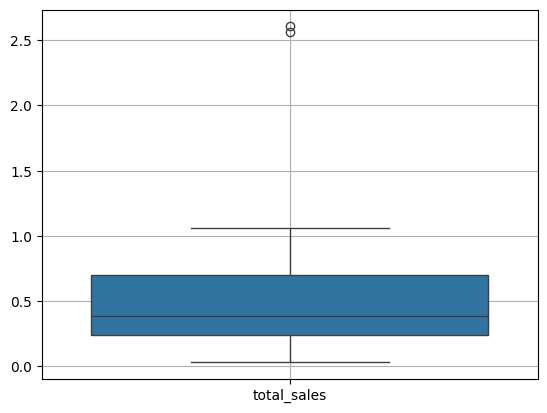

In [218]:
sum_total = games.groupby('platform')['total_sales'].sum()
times_total = games.groupby('platform')['total_sales'].count()
sum_total=sum_total.sort_values()
mean_total = games.groupby('platform')['total_sales'].mean().reset_index()
print('Total of times saling of each platform: \n',times_total.sort_values())
print('\nTotal of sales sum of each platform: \n',sum_total.sort_values())
print('Total of sales mean of each platform: \n',mean_total.sort_values(by='total_sales').reset_index(drop=True))

sns.boxplot(mean_total)
plt.grid(True)

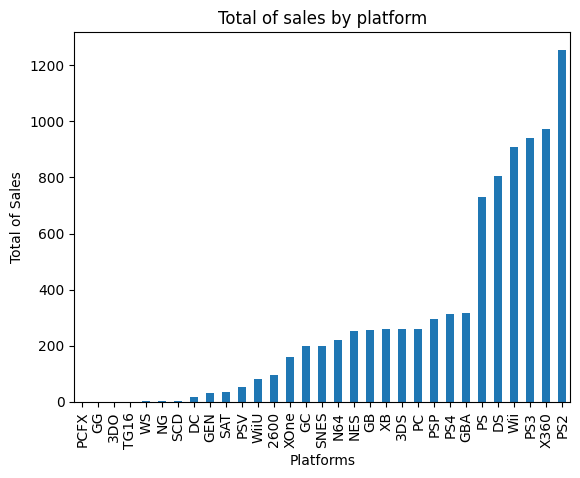

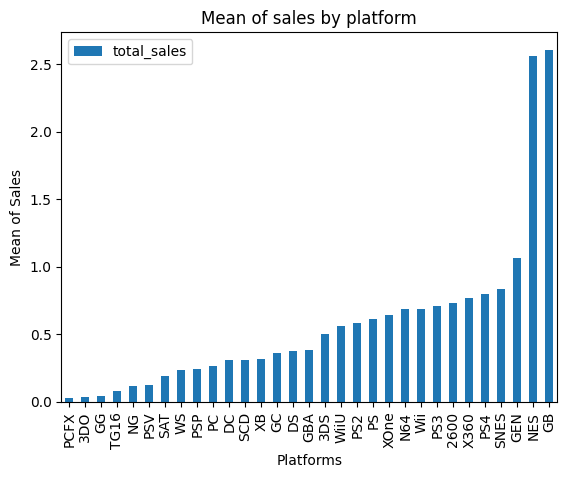

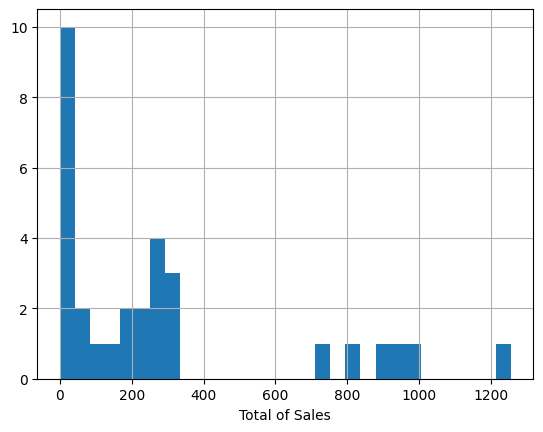

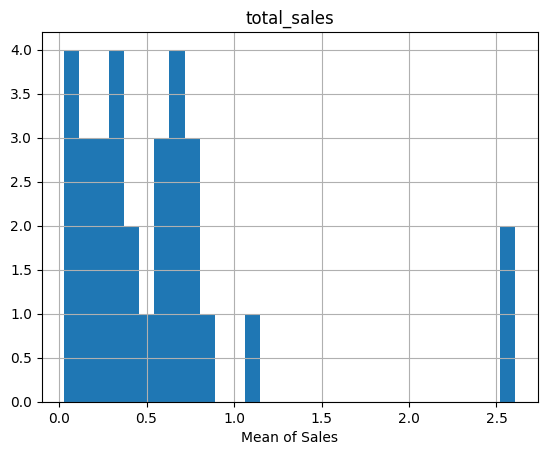

In [219]:
sum_total.plot(kind = 'bar' , x= 'platform' , y = 'total_sales',xlabel='Platforms',title='Total of sales by platform',ylabel='Total of Sales')
plt.show()
mean_total.sort_values(by='total_sales').plot(kind = 'bar' , x= 'platform' , y = 'total_sales',title='Mean of sales by platform',xlabel='Platforms',ylabel='Mean of Sales')
plt.show()
sum_total.hist(bins=30)
plt.xlabel('Total of Sales')
plt.show()
mean_total.sort_values(by='total_sales').hist('total_sales',bins=30)
plt.xlabel('Mean of Sales')
plt.show()

SUMMARY.

According to the above graphs, although PS2 has the best total sales and the best quantity sold, the relationship between total sales and the number of games released is the GB platform.
PS2 sold 2,161 games and earned $1,255.77 million over its entire period, an average of 0.58 per game.
GB sold 98 games and earned $255.46 million, earning $2.60 per game.
The boxplot shows that these two means are outliers because the mu is $0.37 million, and the average sales are between $0.3 and $0.75 million.

How do the opinions of users and professionals affect sales of the Wii platform?

In [220]:
#USER_SCORE ROUND

def change1 (value):
    if value < 0.5 :
        return 0
    elif 0.5 <= value and value<1.5:
        return 1
    elif 1.5 <= value and value<2.5:
        return 2
    elif 2.5 <= value and value<3.5:
        return 3
    elif 3.5 <= value and value<4.5:
        return 4
    elif 4.5 <= value and value<5.5:
        return 5
    elif 5.5 <= value and value<6.5:
        return 6
    elif 6.5 <= value and value<7.5:
        return 7
    elif 7.5 <= value and value<8.5:
        return 8
    elif 8.5 <= value and value<9.5:
        return 9
    elif 9.5 <= value and value<10:
        return 10
   

In [221]:
#CRITIC_SCORE ROUND

def change2 (v):
    if v < 24 :
        return 20
    elif 25 <= v and v < 35:
        return 30
    elif 35 <= v and v < 45:
        return 40
    elif 45 <= v and v < 55:
        return 50
    elif 55 <= v and v < 65:
        return 60
    elif 65 <= v and v < 75:
        return 70
    elif 75 <= v and v < 85:
        return 80
    elif 85 <= v and v < 95:
        return 90
    elif 95 <= v and v < 100:
        return 100


What total sales does each user score have? : 
 userscore_round
0      0.08
1      0.77
2      3.30
3      4.76
4     12.42
5     28.11
6     54.62
7    172.10
8    537.42
9     93.93
Name: total_sales, dtype: float64

How many games does each critic scores have? 
 userscore_round
0      2
1      7
2      8
3     16
4     24
5     53
6     83
7    127
8    931
9     69
Name: total_sales, dtype: int64


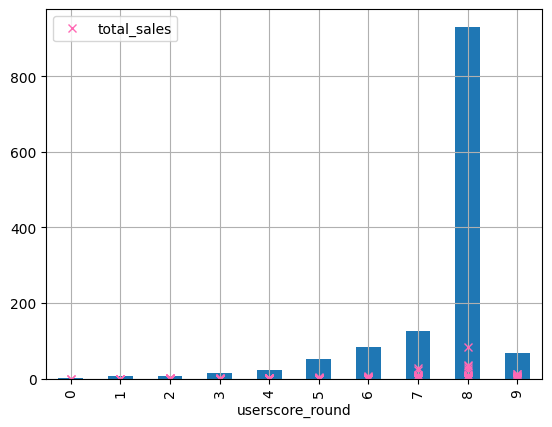


What total sales does each critic score have? : 
 criticscore_round
20       0.16
30       7.74
40      12.76
50      40.32
60      99.39
70     362.19
80     279.92
90      79.01
100     26.02
Name: total_sales, dtype: float64

How many games does each critic scores have? 
 criticscore_round
20       3
30      21
40      46
50      96
60     117
70     908
80     101
90      25
100      3
Name: total_sales, dtype: int64


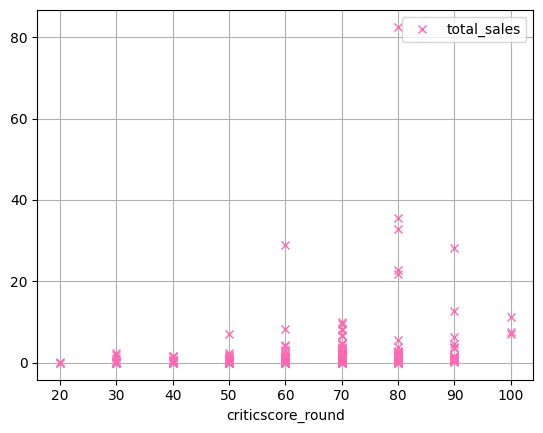

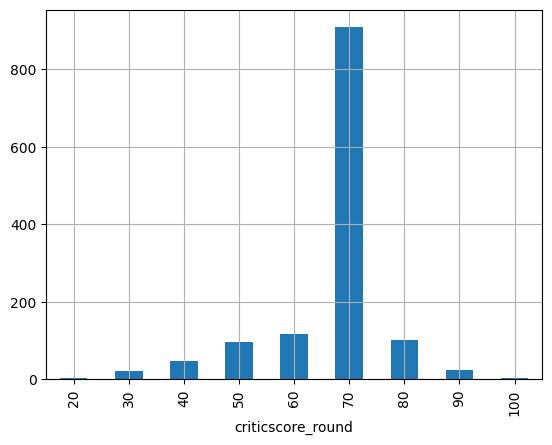

In [222]:
#Wii analysis and filtering

fav=games[games['platform']=='Wii']
#Name with sales
fav_games_sales=fav.groupby('name')['total_sales'].sum()
#Name with user score
fav_games_uscore = fav.groupby('name')['user_score'].sum().reset_index()
#Name with critic score
fav_games_cscore = fav.groupby('name')['critic_score'].sum().reset_index()

#Creat the round column to analyze better the info.
fav_games_uscore['userscore_round']=fav_games_uscore['user_score'].apply(change1)
fav_games_cscore['criticscore_round']=fav_games_cscore['critic_score'].apply(change2)

#MERGE THE INFORMATION OF THE CRITICS AND THE SALES 
everything_user = fav_games_uscore.merge(fav_games_sales,on='name')
everything_critic = fav_games_cscore.merge(fav_games_sales,on='name')

everything_user.plot(x='userscore_round',y='total_sales', grid=True, style='x',color='hotpink')
everything_user.groupby('userscore_round')['name'].count().plot(x='userscore_round',y='name',grid=True,kind='bar')
print('\nWhat total sales does each user score have? : \n',everything_user.groupby('userscore_round')['total_sales'].sum())
print('\nHow many games does each critic scores have? \n',everything_user.groupby('userscore_round')['total_sales'].count())
plt.show()

print('\nWhat total sales does each critic score have? : \n',everything_critic.groupby('criticscore_round')['total_sales'].sum())
print('\nHow many games does each critic scores have? \n',everything_critic.groupby('criticscore_round')['total_sales'].count())
everything_critic.plot(x='criticscore_round',y='total_sales', grid=True, style='x',color='hotpink')
plt.show()
everything_critic.groupby('criticscore_round')['name'].count().plot(x='criticscore_round',y='name',grid=True,kind='bar')
plt.show()


In [223]:
corr_user = fav['user_score'].corr(fav['total_sales'])
corr_cri =  fav['critic_score'].corr(fav['total_sales'])
print('The correlation between the user score and the sales ', corr_user)
print('The correlation between the critic score and the sales ', corr_cri)

The correlation between the user score and the sales  0.05447292941316122
The correlation between the critic score and the sales  0.10649465162384436


SUMMARY.

It seems that the opions in general it kind of affects the sales of the platforms, but the correlation is no high because even that there are games with 80, 90 or 100 scored by profesionals, those scores are not higher than 70 that have the highest total of sales. 
Actually, the ones that scores 50 have better sales than the ones that haev 90 or even 100.
The same goes for the user score, games that have a score of 9 sell less than those that have an 8.


Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas.

General distribution of games by genre. What can be said about the most profitable genres? Can we generalize about genres with high and low sales?

Top 5 Genre in Games 
 genre
Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Name: name, dtype: int64

Top 5 Genre in Sales 
 genre
Action          1744.17
Sports          1331.27
Shooter         1052.45
Role-Playing     934.56
Platform         827.77
Name: total_sales, dtype: float64


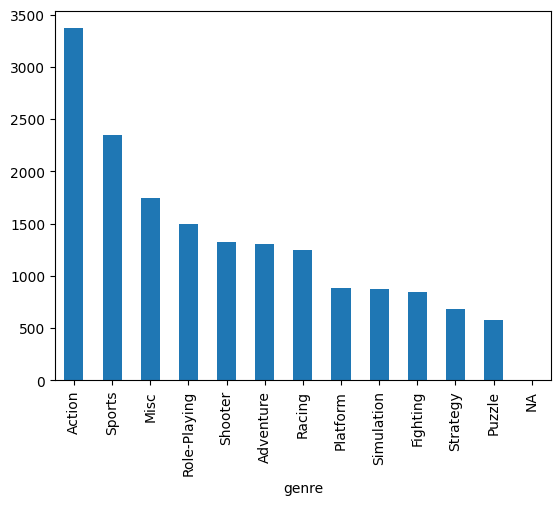

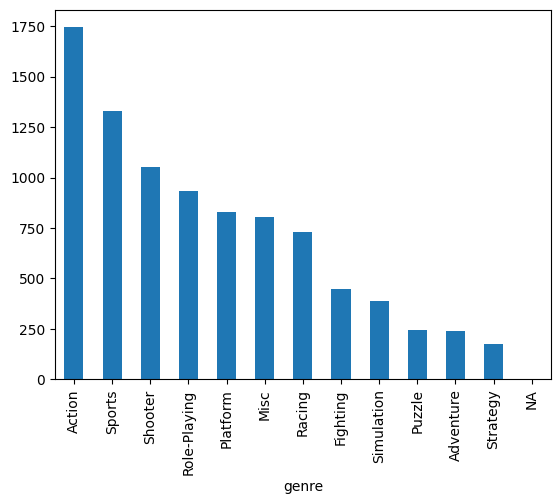

In [224]:
#TOP 5 GENRE IN THE BEST SELLERS AND SALES
games_genre = games.groupby('genre')['name'].count().sort_values(ascending=False)
total_genre = games.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

print('Top 5 Genre in Games \n',games_genre.head())
print('\nTop 5 Genre in Sales \n',total_genre.head())

games_genre.plot(kind='bar')
plt.show()
total_genre.plot(kind='bar')
plt.show()

In [225]:
action = games[games['genre']=='Action'].groupby('platform')['name'].count().sort_values(ascending=False).reset_index()
sports = games[games['genre']=='Sports'].groupby('platform')['name'].count().sort_values(ascending=False).reset_index()
misc = games[games['genre']=='Misc'].groupby('platform')['name'].count().sort_values(ascending=False).reset_index()
role = games[games['genre']=='Role-Playing'].groupby('platform')['name'].count().sort_values(ascending=False).reset_index()
adventure = games[games['genre']=='Adventure'].groupby('platform')['name'].count().sort_values(ascending=False).reset_index()
shooter = games[games['genre']=='Shooter'].groupby('platform')['name'].count().sort_values(ascending=False).reset_index()
platform = games[games['genre']=='Platform'].groupby('platform')['name'].count().sort_values(ascending=False).reset_index()

print('The platform that released more action games\n',action[action['name'] == action['name'].max() ],'\n')
print('The platform that released more sports games\n',sports[sports['name'] == sports['name'].max() ],'\n')
print('The platform that released more misc games\n',misc[misc['name'] == misc['name'].max() ],'\n')
print('The platform that released more role_playing games\n',role[role['name'] == role['name'].max() ],'\n')
print('The platform that released more adventure games\n',adventure[adventure['name'] == adventure['name'].max()],'\n')
print('The platform that released more shooter games\n',shooter[shooter['name'] == shooter['name'].max() ],'\n')
print('The platform that released more platform games\n',platform[platform['name'] == platform['name'].max() ],'\n')

The platform that released more action games
   platform  name
0      PS3   380 

The platform that released more sports games
   platform  name
0      PS2   400 

The platform that released more misc games
   platform  name
0       DS   391 

The platform that released more role_playing games
   platform  name
0       DS   200 

The platform that released more adventure games
   platform  name
0       DS   238 

The platform that released more shooter games
   platform  name
0     X360   203 

The platform that released more platform games
   platform  name
0      GBA   142 



In [226]:
action_t = games[games['genre']=='Action'].groupby('platform')['total_sales'].sum().sort_values(ascending=False).reset_index()
sports_t = games[games['genre']=='Sports'].groupby('platform')['total_sales'].sum().sort_values(ascending=False).reset_index()
misc_t = games[games['genre']=='Misc'].groupby('platform')['total_sales'].sum().sort_values(ascending=False).reset_index()
role_t = games[games['genre']=='Role-Playing'].groupby('platform')['total_sales'].sum().sort_values(ascending=False).reset_index()
adventure_t = games[games['genre']=='Adventure'].groupby('platform')['total_sales'].sum().sort_values(ascending=False).reset_index()
shooter_t = games[games['genre']=='Shooter'].groupby('platform')['total_sales'].sum().sort_values(ascending=False).reset_index()
platform_t = games[games['genre']=='Platform'].groupby('platform')['total_sales'].sum().sort_values(ascending=False).reset_index()

print('The platform with more sales in action games\n',action_t[action_t['total_sales'] == action_t['total_sales'].max()],'\n')
print('The platform with more sales in sports games\n',sports_t[sports_t['total_sales'] == sports_t['total_sales'].max()],'\n')
print('The platform with more sales in misc games\n',misc_t[misc_t['total_sales'] == misc_t['total_sales'].max()],'\n')
print('The platform with more sales in role_playing games\n',role_t[role_t['total_sales'] == role_t['total_sales'].max()],'\n')
print('The platform with more sales in adventure games\n',adventure_t[adventure_t['total_sales'] == adventure_t['total_sales'].max()],'\n')
print('The platform with more sales in shooter games\n',shooter_t[shooter_t['total_sales'] == shooter_t['total_sales'].max()],'\n')
print('The platform with more sales in platform games\n',platform_t[platform_t['total_sales'] == platform_t['total_sales'].max()])

The platform with more sales in action games
   platform  total_sales
0      PS3       301.59 

The platform with more sales in sports games
   platform  total_sales
0      Wii       288.54 

The platform with more sales in misc games
   platform  total_sales
0      Wii       216.21 

The platform with more sales in role_playing games
   platform  total_sales
0       DS       124.45 

The platform with more sales in adventure games
   platform  total_sales
0       DS        45.97 

The platform with more sales in shooter games
   platform  total_sales
0     X360       276.92 

The platform with more sales in platform games
   platform  total_sales
0      NES        95.78


The platforms sell different types of genres, in the top 5 of the most sold genres are:
+ Action with 3369 
+ Sports with 2348 
+ Misc 1750
+ Role-Playing 1498
+ Shooter 1323

However, in the top 5 of the total sales are action and sports, but in third place is Shooter, then Role-Playing, and in the last, Platform. So we can see that there are not the same as the top 5 of the most sold, even though there are more Misc games sold, the revenues are not as goos as shooter games. 

In the top five sold, PS3 sold more action games and had the best total sales.
Wii was the top in total sales of sports and misc games, even though PS2 and DS sold more games in these genres. 
DS won in total sales in role-playing and adventure and the number of games sold. 
In Shooter games, both in sales and in number of games sold, the first place is X360. 
In the genre platform, NES has more revenue, and GBA sells more games in this genre. 

USER PROFILE BY REGION.
--
We have three different regions: North America, Japan and Europe. Let's see which genre and platform are the favorites in each region and which age section (rating) buys the most video games.

In [227]:
#Setting the INFO by region
na_platform = games.groupby('platform')['na_sales'].sum()
na_genre = games.groupby('genre')['na_sales'].sum()
na_rating = games.groupby('rating')['na_sales'].sum()
na_user = games.groupby('user_score')['na_sales'].sum().reset_index()
na_critics = games.groupby('critic_score')['na_sales'].sum().reset_index()


jp_platform = games.groupby('platform')['jp_sales'].sum()
jp_genre = games.groupby('genre')['jp_sales'].sum()
jp_rating = games.groupby('rating')['jp_sales'].sum()
jp_user = games.groupby('user_score')['jp_sales'].sum()
jp_critics = games.groupby('critic_score')['jp_sales'].sum()
fav_games_uscore['userscore_round']=fav_games_uscore['user_score'].apply(change1)
fav_games_cscore['criticscore_round']=fav_games_cscore['critic_score'].apply(change2)



eu_platform = games.groupby('platform')['eu_sales'].sum()
eu_genre = games.groupby('genre')['eu_sales'].sum()
eu_rating = games.groupby('rating')['eu_sales'].sum()
eu_user = games.groupby('user_score')['eu_sales'].sum()
eu_critics = games.groupby('critic_score')['eu_sales'].sum()
fav_games_uscore['userscore_round']=fav_games_uscore['user_score'].apply(change1)
fav_games_cscore['criticscore_round']=fav_games_cscore['critic_score'].apply(change2)


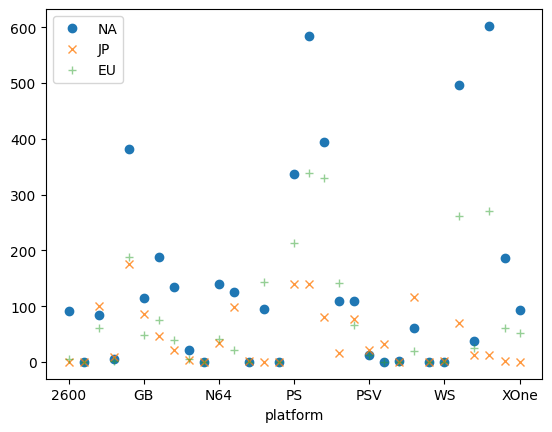

  platform  na_sales
0     X360    602.47
1      PS2    583.84
2      Wii    496.90
3      PS3    393.49
4       DS    382.40 

  platform  jp_sales
0       DS    175.57
1       PS    139.82
2      PS2    139.20
3     SNES    116.55
4      3DS    100.67 

  platform  eu_sales
0      PS2    339.29
1      PS3    330.29
2     X360    270.76
3      Wii    262.21
4       PS    213.61


In [228]:
#Comparing the platforms 
na_platform.plot(style='o')
jp_platform.plot(style='x',alpha=0.8)
eu_platform.plot(style='+',alpha=0.5)
plt.legend(['NA','JP','EU'])
plt.show()
print(na_platform.sort_values(ascending=False).reset_index().head(),'\n')
print(jp_platform.sort_values(ascending=False).reset_index().head(),'\n')
print(eu_platform.sort_values(ascending=False).reset_index().head())

About the favorite platforms in NA, is X360, following is PS2. 
In the graphics is clear that NA have more sales that the other regions. 
In Japan DS is the favorite, then PS and PS2 are almost equal in sales in this region.
In Europe, again PS2 is the favorite, then PS3 and X360. 

We can asume that PS2 is the favorite in avagerage of the three, then it comes X360. 

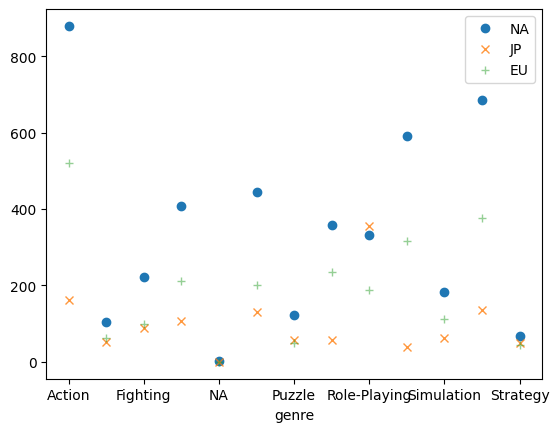

      genre  na_sales
0    Action    879.01
1    Sports    684.43
2   Shooter    592.24
3  Platform    445.50
4      Misc    407.27 

          genre  jp_sales
0  Role-Playing    355.41
1        Action    161.43
2        Sports    135.54
3      Platform    130.83
4          Misc    108.11 

     genre  eu_sales
0   Action    519.13
1   Sports    376.79
2  Shooter    317.34
3   Racing    236.51
4     Misc    212.74


In [229]:
na_genre.plot(style='o')
jp_genre.plot(style='x',alpha=0.8)
eu_genre.plot(style='+',alpha=0.5)
plt.legend(['NA','JP','EU'])
plt.show()
print(na_genre.sort_values(ascending=False).reset_index().head(),'\n')
print(jp_genre.sort_values(ascending=False).reset_index().head(),'\n')
print(eu_genre.sort_values(ascending=False).reset_index().head())

Again, North America has the highest sales of the two regions.
Regarding the genres of video games, action is the first choice for NA and Europe, followed by Sports and then shooters.
NA and Europe have almost the same tastes in videos games, however Europe prefere racing over platform. 
In Japan, people are more into Role-playing than action and sports. Shooter genres are not favorites; actually, shooter genres are the lowest-selling genres in this region.

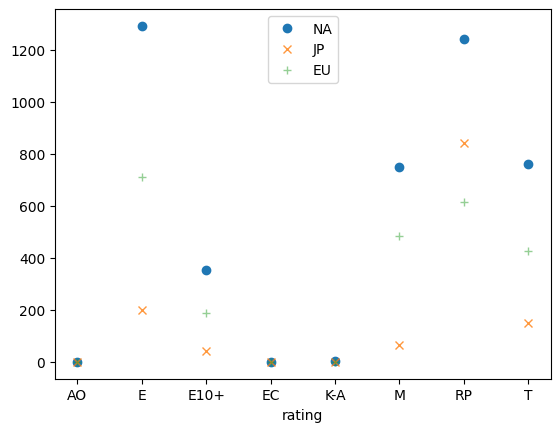

  rating  na_sales
0      E   1292.99
1     RP   1242.46
2      T    759.75
3      M    748.48
4   E10+    353.32
5    K-A      2.56
6     EC      1.53
7     AO      1.26 

  rating  jp_sales
0     RP    841.96
1      E    198.11
2      T    151.40
3      M     64.24
4   E10+     40.20
5    K-A      1.46
6     AO      0.00
7     EC      0.00 

  rating  eu_sales
0      E    710.25
1     RP    613.91
2      M    483.97
3      T    427.03
4   E10+    188.52
5     AO      0.61
6    K-A      0.27
7     EC      0.11


In [230]:
na_rating.plot(style='o')
jp_rating.plot(style='x',alpha=0.8)
eu_rating.plot(style='+',alpha=0.5)
plt.legend(['NA','JP','EU'])
plt.show()

print(na_rating.sort_values(ascending=False).reset_index(),'\n')
print(jp_rating.sort_values(ascending=False).reset_index(),'\n')
print(eu_rating.sort_values(ascending=False).reset_index())

+ E -> EVERYONE
+ E10+ -> EVERYONE +10
+ T -> TEENS
+ M -> MATURE +17
+ AO -> ADULTS ONLY + 18
+ RP -> RATING PENDING

About the rating, we will ignore the RP for now. 
So, in the three regions the games rating with E is the most sold. Then between Mature and adults are section that consume more games than the rest. 


In [231]:
m_platform = na_platform.reset_index().merge(jp_platform.reset_index(), on = 'platform')
m_platform = m_platform.merge(eu_platform.reset_index(), on= 'platform')

m_genre = na_genre.reset_index().merge(jp_genre.reset_index(), on = 'genre')
m_genre = m_genre.merge(eu_genre.reset_index(), on= 'genre')

m_rating = na_rating.reset_index().merge(jp_rating.reset_index(), on = 'rating')
m_rating = m_rating.merge(eu_rating.reset_index(), on= 'rating')

print(m_platform)

   platform  na_sales  jp_sales  eu_sales
0      2600     90.60      0.00      5.47
1       3DO      0.00      0.10      0.00
2       3DS     83.49    100.67     61.48
3        DC      5.43      8.56      1.69
4        DS    382.40    175.57    188.89
5        GB    114.32     85.12     47.82
6       GBA    187.54     47.33     75.25
7        GC    133.46     21.58     38.71
8       GEN     21.05      2.70      6.05
9        GG      0.00      0.04      0.00
10      N64    139.02     34.22     41.06
11      NES    125.94     98.65     21.15
12       NG      0.00      1.44      0.00
13       PC     94.53      0.17    142.44
14     PCFX      0.00      0.03      0.00
15       PS    336.52    139.82    213.61
16      PS2    583.84    139.20    339.29
17      PS3    393.49     80.19    330.29
18      PS4    108.74     15.96    141.09
19      PSP    109.17     76.78     66.68
20      PSV     12.58     21.91     13.12
21      SAT      0.72     32.26      0.54
22      SCD      1.00      0.45   

According with the information above, we can see that the sales in North America in general are bigger that Japan and Europe. 


HYPOTHESIS
--

Test the following hypotheses

H0. The average user ratings for the Xbox One and PC platforms are the same.
H1. The average user ratings for the Xbox One and PC platforms are not the same.

The variance -> 0.9929649852182456
We cannot reject the null hypothesis, the variances are equal.

P value: 0.00010123955107193582 

We reject the null hypothesis, 
 the average user ratings for the Xbox One and PC platforms are NOT the same.


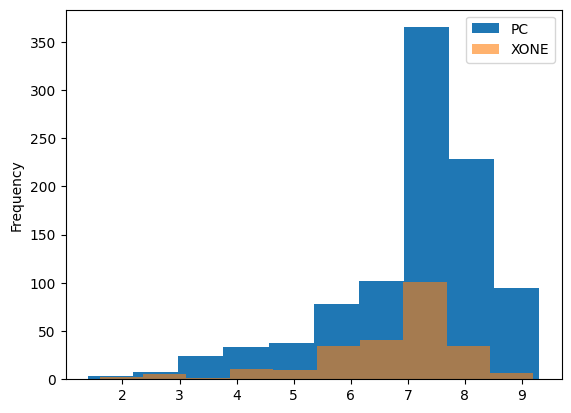

In [232]:
H0_PC = games[games['platform']=='PC']['user_score'].sort_values()
H0_XONE = games[games['platform']=='XOne']['user_score'].sort_values()

H0_PC.plot(kind='hist')
H0_XONE.plot(kind='hist',alpha=0.6)
plt.legend(['PC','XONE'])
alpha = 0.05

var = st.levene(H0_XONE, H0_PC)
print('The variance ->',var.pvalue)

if var.pvalue < alpha:# tu código: compara los valores p obtenidos con el nivel de significación estadística):
    print("We reject the null hypothesis, the variances are not equal\n")
else:
    print("We cannot reject the null hypothesis, the variances are equal.\n")


#Var are equal
test_platforms = st.ttest_ind(H0_PC, H0_XONE,equal_var=True) 
print('P value:', test_platforms.pvalue,'\n')

if test_platforms.pvalue < alpha:# tu código: compara los valores p obtenidos con el nivel de significación estadística):
    print("We reject the null hypothesis, \n the average user ratings for the Xbox One and PC platforms are NOT the same.")
else:
    print("We cannot reject the null hypothesis,\n The average user ratings for the Xbox One and PC platforms are the same.")



— H0. Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.
— H1. Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

The variance -> 0.6828105166182066
We cannot reject the null hypothesis, the variances are equal.

P value: 0.7131417795320426 

We cannot reject the null hypothesis,
The average user ratings for the Action and Sports genres are equal.


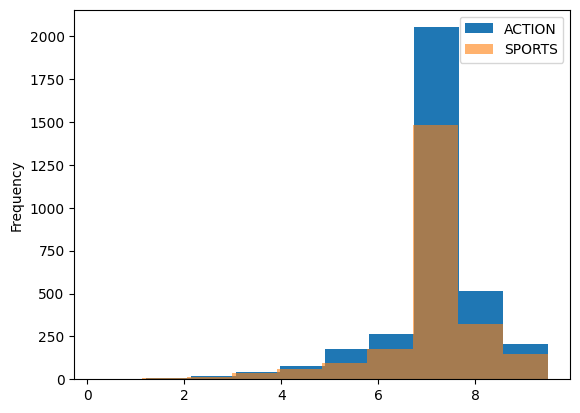

In [233]:
H0_ACT = games[games['genre']=='Action']['user_score']
H0_SPORTS = games[games['genre']=='Sports']['user_score']

H0_ACT.plot(kind='hist')
H0_SPORTS.plot(kind='hist',alpha=0.6)
plt.legend(['ACTION','SPORTS'])

alpha = 0.05

var2 = st.levene(H0_ACT, H0_SPORTS)
print('The variance ->',var2.pvalue)

if var2.pvalue < alpha:
    print("We reject the null hypothesis, the variances are not equal\n")
else:
    print("We cannot reject the null hypothesis, the variances are equal.\n")

test_genre = st.ttest_ind(H0_ACT, H0_SPORTS,equal_var=True) 
print('P value:', test_genre.pvalue,'\n')

if test_genre.pvalue < alpha:# tu código: compara los valores p obtenidos con el nivel de significación estadística):
    print("We reject the null hypothesis,\n The average user ratings for the Action and Sports genres are NOT equal.")
else:
    print("We cannot reject the null hypothesis,\nThe average user ratings for the Action and Sports genres are equal.")


Conclusions
--
For the 2016 strategy this data set had alot of important information, fisrt it had to be cleant, check the values, the columns and managed it to have all the information in order to start the analysis. 
After that, the analysis of the platforms was easier, it's important to make the correct questions and be curios about the informacion that we have. For example, it would be could to analyze the stategy the platforms that had more revenues with less games released. 
A lot of the pricipal platforms with the highest sales released a lot of games each year, while they released more games they will have more incomes. However, the plaforms need to hurry up because the life time companies in average last 11 years, and into those years they have almost 4 to reach their hightest point in sales.
Also, the amount of 